In [248]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_df =pd.read_csv('X_train_NHkHMNU.csv', delimiter= ',')
y_df =pd.read_csv('y_train_ZAN5mwg.csv', delimiter= ',')
X_test_df =pd.read_csv('X_test_final.csv', delimiter= ',')
df = pd.merge(X_df,y_df,on='ID')
print(df.shape)
df.head(10)

(1494, 36)


,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,0.028313
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,-0.112516
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,-0.180840
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,-0.260356
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,-0.071733
5,1520,467,FR,-0.295296,-0.765120,-0.717490,0.717490,-1.117139,-0.200305,1.117139,...,-0.962519,-0.193837,-0.871600,-0.917234,0.102046,0.472708,0.891049,0.861408,1.124457,0.932105
6,1546,144,FR,-0.234965,-0.677085,0.399588,-0.399588,0.183998,-0.986235,-0.183998,...,-1.658394,-0.529800,-0.318920,-1.220760,-0.512991,0.147507,1.889739,0.498226,0.681739,0.192680
7,1069,1136,FR,0.332223,-0.546797,-0.507773,0.507773,NaN,0.569585,NaN,...,-0.744328,-0.051535,-0.701035,-0.394857,1.990978,0.902719,0.206769,0.993304,-0.223739,0.112850
8,1323,83,FR,-0.023023,-0.604694,-1.196787,1.196787,-0.519339,0.373109,0.519339,...,-0.207390,0.009356,-0.261496,-0.841560,-1.024980,-1.564174,2.688208,3.061210,3.755240,0.076153
9,1618,307,FR,0.564657,0.273776,-0.439063,0.439063,-0.636654,0.342057,0.636654,...,-0.972344,-0.806435,-0.752273,-0.767578,-0.371475,-0.459768,-1.487154,-0.692378,-0.768283,0.000000


In [249]:
df.isnull().sum()

ID                    0
DAY_ID                0
COUNTRY               0
DE_CONSUMPTION        0
FR_CONSUMPTION        0
DE_FR_EXCHANGE       25
FR_DE_EXCHANGE       25
DE_NET_EXPORT       124
FR_NET_EXPORT        70
DE_NET_IMPORT       124
FR_NET_IMPORT        70
DE_GAS                0
FR_GAS                0
DE_COAL               0
FR_COAL               0
DE_HYDRO              0
FR_HYDRO              0
DE_NUCLEAR            0
FR_NUCLEAR            0
DE_SOLAR              0
FR_SOLAR              0
DE_WINDPOW            0
FR_WINDPOW            0
DE_LIGNITE            0
DE_RESIDUAL_LOAD      0
FR_RESIDUAL_LOAD      0
DE_RAIN              94
FR_RAIN              94
DE_WIND              94
FR_WIND              94
DE_TEMP              94
FR_TEMP              94
GAS_RET               0
COAL_RET              0
CARBON_RET            0
TARGET                0
dtype: int64

In [250]:
print(df.dtypes)

ID                    int64
DAY_ID                int64
COUNTRY              object
DE_CONSUMPTION      float64
FR_CONSUMPTION      float64
DE_FR_EXCHANGE      float64
FR_DE_EXCHANGE      float64
DE_NET_EXPORT       float64
FR_NET_EXPORT       float64
DE_NET_IMPORT       float64
FR_NET_IMPORT       float64
DE_GAS              float64
FR_GAS              float64
DE_COAL             float64
FR_COAL             float64
DE_HYDRO            float64
FR_HYDRO            float64
DE_NUCLEAR          float64
FR_NUCLEAR          float64
DE_SOLAR            float64
FR_SOLAR            float64
DE_WINDPOW          float64
FR_WINDPOW          float64
DE_LIGNITE          float64
DE_RESIDUAL_LOAD    float64
FR_RESIDUAL_LOAD    float64
DE_RAIN             float64
FR_RAIN             float64
DE_WIND             float64
FR_WIND             float64
DE_TEMP             float64
FR_TEMP             float64
GAS_RET             float64
COAL_RET            float64
CARBON_RET          float64
TARGET              

In [251]:
def preprocess_df(df):
    df = df.fillna(0)
    df['COUNTRY'] = df['COUNTRY'].apply(lambda x: 1 if x == 'FR' else 0)
    return df

In [252]:
def correlation_colonne (df_train_processed):
    correlations= df_train_processed.select_dtypes(include=['float64', 'int64', 'bool']).corrwith(df_train_processed['TARGET']).abs()
    #On trie les corrélations par ordre décroissant
    correlations= correlations.sort_values(ascending=False)
    #On garde les colonnes avec les corrélations les plus élevées
    seuil=0.04
    correlated_columns = correlations[correlations >seuil].index
    #On les mets dans df_train_bis une dataframe que l'on utilisera pour entrainer le modèle
    df_train_bis= df_train_processed[correlated_columns]
    #On affiche les 10 colonnes avec le plus de corrélation avec le log_price
    print(correlations.sort_values(ascending=False).head(10))
    #On s'assure que toutes les colonnes utilisées pendant l'entraînement sont présentes
    return df_train_bis, correlated_columns

df_train_processed = preprocess_df(df)
df_train_bis, correlated_columns = correlation_colonne(df_train_processed)
#On affiche la nouvelle dataframe
print(df_train_bis)

TARGET              1.000000
DE_NET_EXPORT       0.151447
DE_NET_IMPORT       0.151447
DE_WINDPOW          0.150287
DE_RESIDUAL_LOAD    0.132555
FR_WINDPOW          0.132523
DE_GAS              0.096657
DE_HYDRO            0.086127
DE_WIND             0.081542
FR_HYDRO            0.052820
dtype: float64
        TARGET  DE_NET_EXPORT  DE_NET_IMPORT  DE_WINDPOW  DE_RESIDUAL_LOAD  \
0     0.028313       0.000000       0.000000   -0.573370          0.626666   
1    -0.112516      -0.573520       0.573520   -0.035514         -0.395469   
2    -0.180840      -0.622021       0.622021   -0.298755          1.336625   
3    -0.260356      -0.270870       0.270870   -0.010090         -1.191889   
4    -0.071733       0.000000       0.000000   -0.774941          0.571613   
...        ...            ...            ...         ...               ...   
1489 -0.172597      -0.218658       0.218658   -0.057214          1.547782   
1490 -0.063546       0.449153      -0.449153    0.198857          1.358

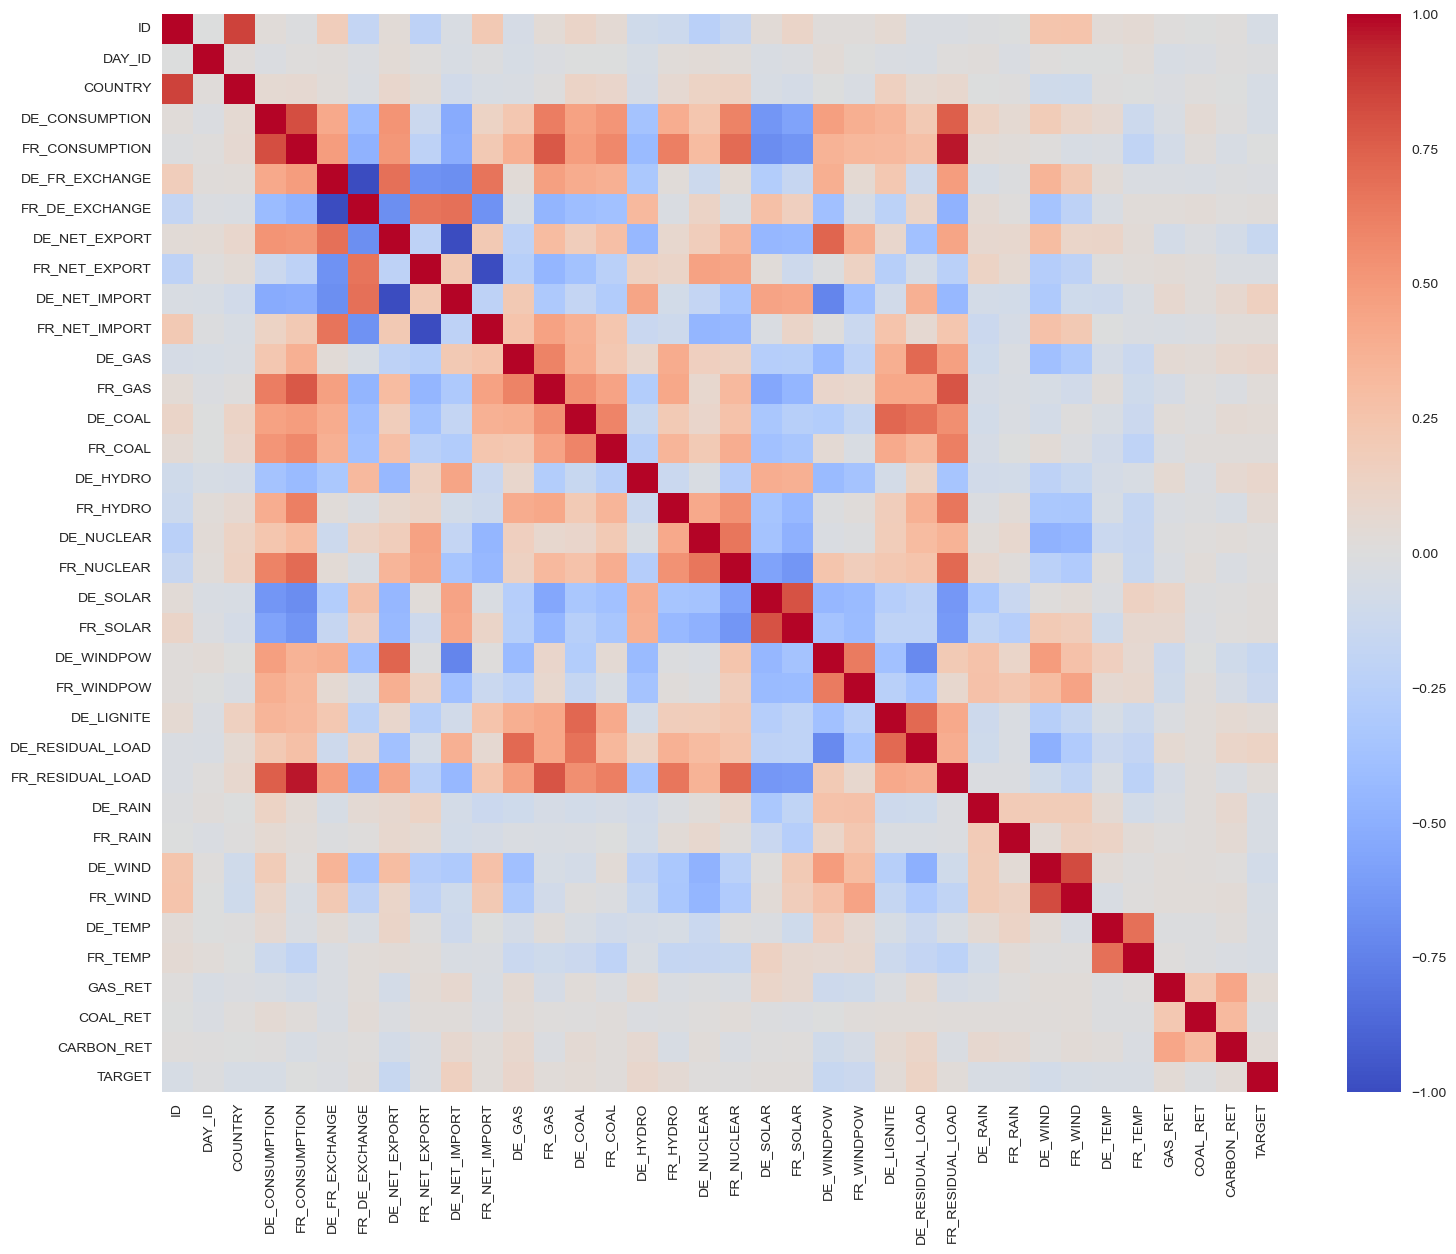

In [253]:
correlations= df_train_processed.select_dtypes(include=['float64', 'int64', 'bool']).corrwith(df_train_processed['TARGET']).abs()
correlations_bis= correlations.sort_values(ascending=False)
#on augmente le seuil pour prendre moins de colonne et avoir quelque chose de lisible
seuil=0.001
correlated_columns = correlations[correlations >seuil].index
#On les mets dans df_train_3 spécialemént pour faire une matrice de corrélation avec les colonnes les plus corrélée avec TARGET
df_train_3= df_train_processed[correlated_columns]

correlation_matrix = df_train_3.corr(method='pearson', min_periods=1)
non_numeric_cols = correlation_matrix.select_dtypes(exclude=[np.number]).columns
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [254]:
def correlation_colonne (df_train_processed):
    correlations= df_train_processed.select_dtypes(include=['float64', 'int64', 'bool']).corrwith(df_train_processed['TARGET']).abs()
    #On trie les corrélations par ordre décroissant
    correlations= correlations.sort_values(ascending=False)
    #On garde les colonnes avec les corrélations les plus élevées ici au dessus de 3% 
    seuil=0.001
    correlated_columns = correlations[correlations >seuil].index
    #On les mets dans df_train_bis une dataframe que l'on utilisera pour entrainer le modèle
    df_train_bis= df_train_processed[correlated_columns]
    #On s'assure que toutes les colonnes utilisées pendant l'entraînement sont présentes
    return df_train_bis, correlated_columns

df_train_processed = preprocess_df(df)
df_train_bis, correlated_columns = correlation_colonne(df_train_processed)
#On affiche la nouvelle dataframe
print(df_train_bis)

        TARGET  DE_NET_EXPORT  DE_NET_IMPORT  DE_WINDPOW  DE_RESIDUAL_LOAD  \
0     0.028313       0.000000       0.000000   -0.573370          0.626666   
1    -0.112516      -0.573520       0.573520   -0.035514         -0.395469   
2    -0.180840      -0.622021       0.622021   -0.298755          1.336625   
3    -0.260356      -0.270870       0.270870   -0.010090         -1.191889   
4    -0.071733       0.000000       0.000000   -0.774941          0.571613   
...        ...            ...            ...         ...               ...   
1489 -0.172597      -0.218658       0.218658   -0.057214          1.547782   
1490 -0.063546       0.449153      -0.449153    0.198857          1.358927   
1491  0.151797      -1.531544       1.531544   -0.981718          1.493870   
1492 -0.640917      -0.304856       0.304856    0.378080         -0.137667   
1493 -0.252764       0.296651      -0.296651    0.317696         -0.359599   

      FR_WINDPOW    DE_GAS  DE_HYDRO   DE_WIND  FR_HYDRO  ...  

In [255]:
seuil=0.1
correlated_columns = correlations[correlations >seuil].index
df_train_bis = df_train_processed[list(correlated_columns)]

cols_to_standardize = [col for col in df_train_bis.columns if col not in ['ID', 'COUNTRY', 'TARGET']]
scaler = StandardScaler()
df_train_bis[cols_to_standardize] = scaler.fit_transform(df_train_bis[cols_to_standardize])

X = df_train_bis.drop(columns=['TARGET'])
y = df_train_bis['TARGET']

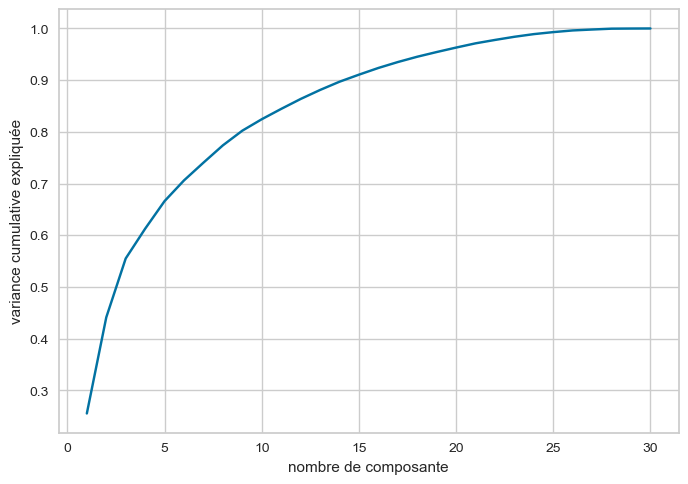

In [256]:
pca = PCA(n_components=30)
X_pca= pca.fit_transform(X_normalized)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, 30+1), explained_variance)
plt.xlabel('nombre de composante')
plt.ylabel('variance cumulative expliquée')
plt.grid(True)
plt.show()

In [257]:
X_train,X_test, y_train,y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [258]:
y_pred_train= model.predict(X_train)
print(spearmanr(y_pred_train, y_train).correlation)

0.2971685877801851
